# Google Playstore 데이터 불러오기

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/playstore/Google-Playstore-Full.csv')

In [149]:
data.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   App Name         267051 non-null  object 
 1   Category         267051 non-null  object 
 2   Rating           267052 non-null  object 
 3   Reviews          267051 non-null  object 
 4   Installs         267052 non-null  object 
 5   Size             267052 non-null  object 
 6   Price            267052 non-null  object 
 7   Content Rating   267052 non-null  object 
 8   Last Updated     267052 non-null  object 
 9   Minimum Version  267051 non-null  object 
 10  Latest Version   267049 non-null  object 
 11  Unnamed: 11      18 non-null      object 
 12  Unnamed: 12      3 non-null       object 
 13  Unnamed: 13      2 non-null       object 
 14  Unnamed: 14      1 non-null       float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


## Unname 컬럼은 NaN으로 구성되어있으므로 제거 진행

In [162]:
data = data.drop(columns = data.columns[11:15],axis=1)

In [175]:
data.isna().sum()

Category           0
Rating             0
Reviews            1
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    1
Latest Version     3
dtype: int64

변수 설명

*   App : 앱의 이름
*   Category : 앱의 카테고리 유형
* Rating : 앱의 평점
* Reviews : 앱의 리뷰 수
* SIze : 앱의 크기
* Installs : 앱의 설치 수 (Target)
* Type : 무료/유료 구분
* Content Rating : 사용가능 연령
* Genres : 앱의 장르, 카테고리와 비슷
* Last Updated : 최근 업데이트 날짜
* Current Ver : 최근 앱의 버전
* Android Ver : 안드로이드에서의 버전



# Data preprocessing 진행

Rating 변수 이외에 다른 변수들은 모두 Object 형인 것을 알 수 있다. 데이터 분석 및 머신러닝을 진행하기 위해 변수들을 수치화 시켜줘야한다.

# App
App 변수는 앱의 이름으로 target값과 연관을 짓기 어려움으로 삭제

In [70]:
data = data.drop(columns = 'App',axis=1)

# Category
Category 변수는 범주형 변수로서 One hot encoding 을 통하여 수치화 시켜준다.

In [171]:
data['Category'].unique()

array(['FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'LIFESTYLE',
       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_RACING', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY',
       'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO',
       'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION',
       'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'GAME_WORD', 'ART_AND_DESIGN',
       'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'SOCIAL',
       'BEAUTY', 'GAME_CASINO', 'MAPS_AND_NAVIGATION', 'PERSONALIZATION',
       'GAME_CARD', 'TOOLS', 'SPORTS', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'COMICS', 'PARENTING', 'DATING', 'WEATHER',
       'MEDICAL', ' Podcasts', ' Channel 2 News', nan, ' Breaking News',
       'TRAVEL'], dtype=object)

In [170]:
data = data.drop(index = data[data['Category'] == ')'].index)
data = data.drop(index = data[data['Category'] == 'nan'].index)
data = data.drop(index = data[data['Category'] == '6'].index)
data = data.drop(index = data[data['Category'] == ')'].index)
data = data.drop(index = data[data['Category'] == 'Gate ALARM'].index)
data = data.drop(index = data[data['Category'] == ' Alfabe �?ren'].index)
data = data.drop(index = data[data['Category'] == ' T�rk Alfabesi'].index)
data = data.drop(index = data[data['Category'] == ' not notified you follow -'].index)
data = data.drop(index = data[data['Category'] == ' Mexpost)'].index)
data = data.drop(index = data[data['Category'] == ' Romantic Song Music Love Songs'].index)
data = data.drop(index = data[data['Category'] == ' Speaker Pro 2019'].index)
data = data.drop(index = data[data['Category'] == ' ETEA & MDCAT'].index)
data = data.drop(index = data[data['Category'] == ' Tour Guide'].index)
data = data.drop(index = data[data['Category'] == ' ETEA & MDCAT'].index)
data = data.drop(index = data[data['Category'] == ' Islamic Name Boy & Girl+Meaning'].index)
data = data.drop(index = data[data['Category'] == ' Accounting'].index)
data = data.drop(index = data[data['Category'] == ' super loud speaker booster'].index)

In [174]:
data = data.drop(index = data[data['Category'].isna()].index)

In [73]:
category_list = data['Category'].unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

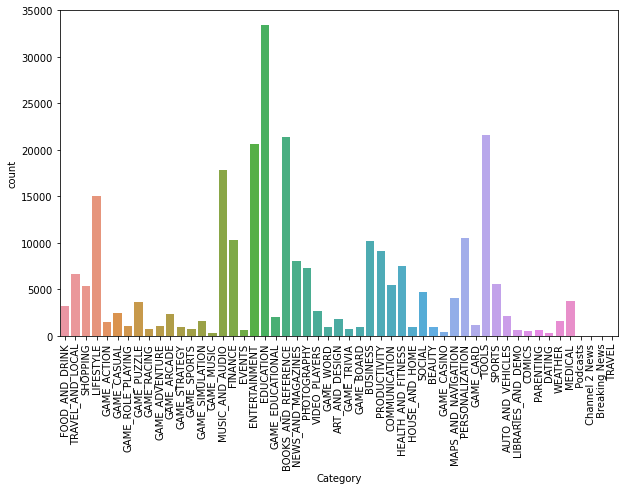

In [176]:
plt.figure(figsize =(10,6))
sns.countplot(x='Category', data=data)
plt.xticks(rotation=90)

In [177]:
cc = pd.DataFrame(pd.Series(data['Category']).value_counts())


In [179]:
cc

,Category
EDUCATION,33394
TOOLS,21592
BOOKS_AND_REFERENCE,21377
ENTERTAINMENT,20604
MUSIC_AND_AUDIO,17876
LIFESTYLE,15034
PERSONALIZATION,10544
FINANCE,10342
BUSINESS,10230
PRODUCTIVITY,9142


In [77]:
dp = pd.get_dummies(data['Category'])

In [78]:
data = data.merge(dp, left_index=True,right_index=True)
data = data.drop(columns='Category',axis=1)

# Rating
Rating은 실수형이지만 Null값을 가지고 있으므로 이를 처리해야 한다.

In [79]:
data['Rating'].isna().sum()

1474

In [80]:
data[['Rating','Installs']].sort_values(by='Installs').head(10)

,Rating,Installs
9148,NaN,0
5307,NaN,0+
6692,NaN,0+
9719,NaN,0+
7434,NaN,0+
8871,NaN,0+
5486,NaN,0+
9905,NaN,0+
4465,NaN,0+
9934,NaN,0+


설치수가 0인 경우 App의 Rating 값이 없다는 것을 알 수 있다. <br>
Installs 수가 너무 없는 데이터는 제외하고 어느정도 설치가 되어있는 경우 Rating이 없는 것은 0으로 채워 준다.

In [84]:
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')

In [85]:
data['Installs'] = data['Installs'].astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

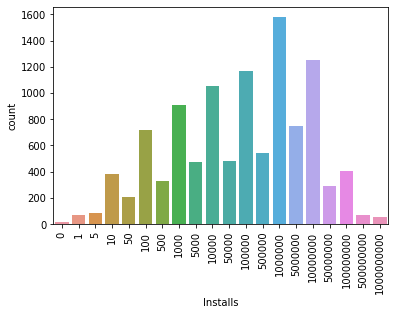

In [86]:
sns.countplot(data=data, x='Installs')
plt.xticks(rotation=90)

Installs가 5 이하인 경우에는 데이터수가 100개도 안되므로 의미있는 결과가 나타날거라고 보기우므로 삭제

In [87]:
indexlist = data[data['Installs']<=5].index

data = data.drop(index = indexlist)

In [88]:
data['Rating'] = data['Rating'].fillna(0)

In [89]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

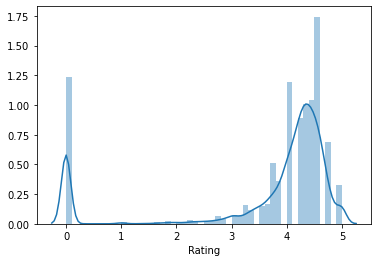

In [90]:
sns.distplot(data['Rating'])

# Reviews 

In [91]:
data['Reviews'].isna().sum()

0

In [92]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [93]:
data['Reviews']=data['Reviews'].astype(int)

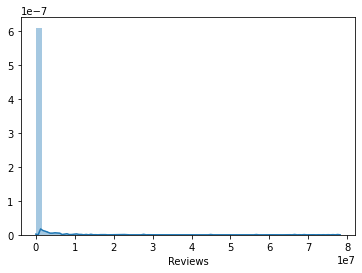

In [94]:
sns.distplot(data['Reviews'])

In [95]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Size
M = 1,000,000<br>
K = 1,000<br>

문자형을 숫자데이터로 변환시켜준다.

In [96]:
data['Size'][0] = data['Size'][0].replace('M','000000')
data['Size'][0]

'19000000'

In [97]:
index_list = data.index

In [98]:
for i in index_list:
  if '.' in data['Size'][i]:
    data['Size'][i] = data['Size'][i].replace('.','').replace('M','00000').replace('K','00').replace('k','00')
    
  else:
    data['Size'][i] = data['Size'][i].replace('M','000000').replace('K','000').replace('k','000')



In [99]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
index_list = data[data['Size'] == 'Varies with device'].index

In [101]:
data = data.drop(index = index_list,axis=0)


In [102]:
data['Size'] = data['Size'].astype(int)

# Type

범주형 번수로서 one hot encoding 으로 변경해준다.

In [103]:

dp = pd.get_dummies(data['Type'])

data = data.merge(dp, left_index= True, right_index=True)

data = data.drop(columns = 'Type', axis=1)

In [104]:
data.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid
0,4.1,159,19000000,10000,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.9,967,14000000,500000,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4.7,87510,8700000,5000000,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4.5,215644,25000000,50000000,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Price
$표시를 없앤후 float형 데이터로 변환

In [105]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$299.99', '$379.99', '$37.99', '$18.99', '$389.99',
       '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$15.46', '$8.99', '$3.04',
       '$13.99', '$4.29', '$2.60', '$3.28', '$4.60', '$2.90', '$1.97',
       '$89.99', '$2.56', '$3.61', '$1.26', '$1.20', '$1.04'],
      dtype=object)

In [106]:
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].astype(float)

# Content Rating
번주형 변수로서 One hot encoding을 진행하여 수치형 데이터로 변환


In [107]:
dp = pd.get_dummies(data['Content Rating'])

data = data.merge(dp,left_index=True,right_index=True)

In [108]:
data = data.drop(columns ='Content Rating', axis=1)

# Genres
Category 와 매우 유사함으로 Genre 컬럼은 삭제

In [109]:
data = data.drop(columns='Genres', axis=1)

# LastUpdated
최근 업데이트 된 날짜로서 나중에 날짜데이터를 활용할 가능성이 있으므로 날짜형식으로 변환

In [110]:
from datetime import datetime

In [111]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [112]:
date_list = []
for str in data['Last Updated']:
  s = datetime.strptime(str,"%B %d, %Y")
  date_list.append(s)


In [113]:
data['Last Updated'] = date_list

In [114]:
data.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,2018-01-07,1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,2018-01-15,2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,2018-08-01,1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,2018-06-08,Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,2018-06-20,1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Current Ver ,Android Ver
버젼은 App마다 update되는 형식이 다르고 이를 통하여 의미있는 피쳐엔지니어링을 하기 어렵다고 생각된다. 여기서는 없애고 사용


In [115]:
data = data.drop(columns=['Current Ver', 'Android Ver'], axis=1)

In [116]:
data.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Free,Paid,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,2018-01-07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,2018-01-15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,2018-08-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,2018-06-08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,2018-06-20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8989 entries, 0 to 10840
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Rating               8989 non-null   float64       
 1   Reviews              8989 non-null   int64         
 2   Size                 8989 non-null   int64         
 3   Installs             8989 non-null   int64         
 4   Price                8989 non-null   float64       
 5   Last Updated         8989 non-null   datetime64[ns]
 6   ART_AND_DESIGN       8989 non-null   uint8         
 7   AUTO_AND_VEHICLES    8989 non-null   uint8         
 8   BEAUTY               8989 non-null   uint8         
 9   BOOKS_AND_REFERENCE  8989 non-null   uint8         
 10  BUSINESS             8989 non-null   uint8         
 11  COMICS               8989 non-null   uint8         
 12  COMMUNICATION        8989 non-null   uint8         
 13  DATING               8989 non-nu

# 베이스라인 모델링 구현

In [118]:
from sklearn.model_selection import train_test_split

target = data['Installs']
train = data.drop(columns = ['Installs','Last Updated'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(train, target, random_state=10, test_size=0.3)

In [119]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 300, learning_rate=0.1, random_state=10)
xgb.fit(train_x,train_y)
prediction = xgb.predict(test_x)


[11:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [120]:
test_y

6693         5000
2917     10000000
9275         5000
9490       100000
10496         100
           ...   
8633      5000000
9898          100
1632       100000
9531          500
6534         5000
Name: Installs, Length: 2697, dtype: int64

In [121]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_y,prediction)



148829644249412.6

# 변수 선택

In [137]:
input_var = train.columns

In [138]:
xgb.feature_importances_
imp_df = pd.DataFrame({"var": input_var,
                       "imp":xgb.feature_importances_})

In [139]:
imp_df = imp_df.sort_values(by = 'imp', ascending=False)

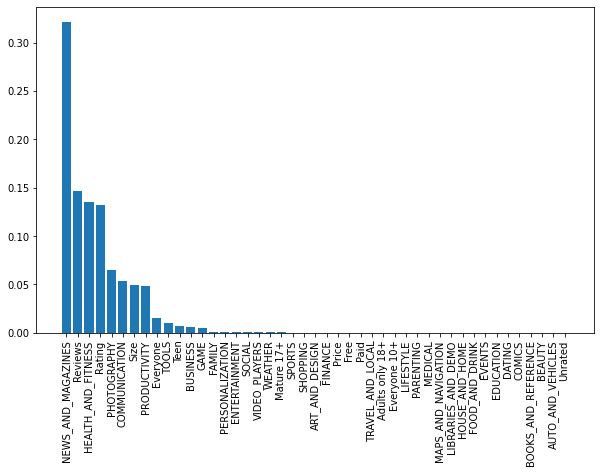

In [141]:
plt.figure(figsize = (10,6))
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

## One_hot Encoding을 사용한 컬럼이 아닌 컬럼들 만 선택 



---



*   Reviews
*   Rating
* Size






In [142]:
select_list = ['Reviews','Rating', 'Size']

In [144]:
train = train[select_list]
x_train,x_test,y_train,y_test = train_test_split(train, target, test_size = 0.3)

In [145]:
xgb.fit(x_train, y_train)
prediction = xgb.predict(x_test )

[11:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [146]:
mean_squared_error(y_test,prediction)

55756543987873.01